In [1]:
import pandas as pd
import os

In [2]:
df=pd.read_csv("Sales_Data/Sales_April_2019.csv")
df.head()


Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

# task1 :-merge the 12 months data into a single CSV file

In [3]:
files=[file for file in os.listdir('Sales_Data/')]

all_months_data=pd.DataFrame()
  
for file in files :
    df=pd.read_csv('Sales_Data/'+file)
    all_months_data=pd.concat([all_months_data,df])
    
    all_months_data.to_csv("all_data.csv",index=False)
  

# Read in update dataframe

In [4]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

# clean up the data

In [5]:
all_data.head(100)

Order ID                     Product Quantity Ordered Price Each  \
0    176558        USB-C Charging Cable                2      11.95   
1       NaN                         NaN              NaN        NaN   
2    176559  Bose SoundSport Headphones                1      99.99   
3    176560                Google Phone                1        600   
4    176560            Wired Headphones                1      11.99   
..      ...                         ...              ...        ...   
95   176648            27in FHD Monitor                1     149.99   
96   176649        USB-C Charging Cable                1      11.95   
97   176650    Lightning Charging Cable                1      14.95   
98   176651                      iPhone                1        700   
99   176652          LG Washing Machine                1      600.0   

        Order Date                      Purchase Address  
0   04/19/19 08:46          917 1st St, Dallas, TX 75001  
1              NaN                                   NaN  
2   04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3   04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4   04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
..             ...                                   ...  
95  04/24/19 01:17        732 2nd St, Portland, OR 97035  
96  04/09/19 08:49  702 11th St, San Francisco, CA 94016  
97  04/12/19 16:47        153 River St, Boston, MA 02215  
98  04/07/19 13:14        997 South St, Boston, MA 02215  
99  04/09/19 20:04  502 14th St, New York City, NY 10001  

[100 rows x 6 columns]

# Drop the Nan rows

In [6]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()
#NaN data is present in data 

Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN

In [7]:
all_data=all_data.dropna(how='all')
all_data.head()
#here all the NaN data will drop

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

# Find or and delete it

In [8]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

In [9]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data.head()


Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

In [10]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

# add a Sales column

In [11]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99

# what is the best month for sales? how much was earned that month?

In [12]:
results=all_data.groupby('Month').sum()
results

Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06

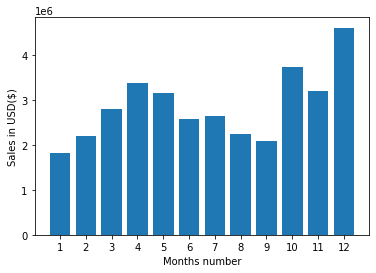

In [13]:
import matplotlib.pyplot as plt 
months = range(1,13)
plt.bar(months ,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Months number')
plt.show()

# What city had the highest number of sales

# Firstly make the city column

In [14]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
  return address.split(',')[2].split(' ')[1] 


all_data['City'] = all_data["Purchase Address"].apply(lambda x: get_city(x)+ ' '+ get_state(x))
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

              City  
0        Dallas TX  
2        Boston MA  
3   Los Angeles CA  
4   Los Angeles CA  
5   Los Angeles CA

In [15]:
results=all_data.groupby('City').sum()
results


Quantity Ordered    Price Each   Month         Sales
City                                                                   
 Atlanta GA                   16602  2.779908e+06  104794  2.795499e+06
 Austin TX                    11153  1.809874e+06   69829  1.819582e+06
 Boston MA                    22528  3.637410e+06  141112  3.661642e+06
 Dallas TX                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles CA               33289  5.421435e+06  208325  5.452571e+06
 New York City NY             27932  4.635371e+06  175741  4.664317e+06
 Portland ME                   2750  4.471893e+05   17144  4.497583e+05
 Portland OR                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco CA             50239  8.211462e+06  315520  8.262204e+06
 Seattle WA                   16553  2.733296e+06  104941  2.747755e+06

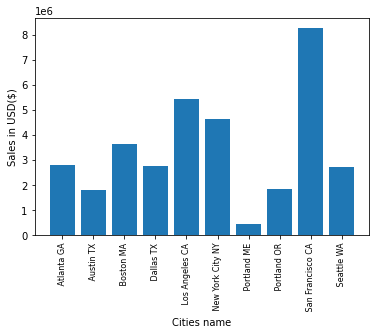

In [16]:
import matplotlib.pyplot as plt 
# cities = all_data['City'].unique()   #it shows the Austin has the max sale instead of showing SanFrancisco

cities=[City for City , df in all_data.groupby('City')]
plt.bar(cities ,results['Sales'])
plt.xticks(cities , rotation='vertical' ,size=8)
plt.ylabel('Sales in USD($)')
plt.xlabel('Cities name')
plt.show()

# What time should we display advertisements to maximize likelihood of customer's buying product?

In [17]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

              City  
0        Dallas TX  
2        Boston MA  
3   Los Angeles CA  
4   Los Angeles CA  
5   Los Angeles CA

In [18]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [19]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute

all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

              City  Hour  Minute  
0        Dallas TX     8      46  
2        Boston MA    22      30  
3   Los Angeles CA    14      38  
4   Los Angeles CA    14      38  
5   Los Angeles CA     9      27

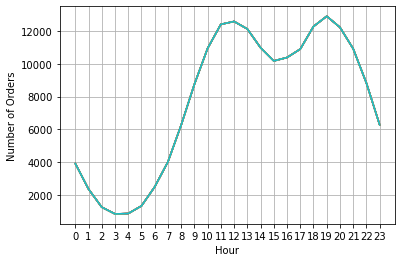

In [20]:
hours=[hour for hour , df in all_data.groupby('Hour')]
plt.plot(hours , all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


It shows 11am and 7pm is most product was sold in 12th months 

# What product often sold together?

In [21]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head(100)

<ipython-input-21-f321ad44697f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


Order ID                                            Grouped
3      176560                      Google Phone,Wired Headphones
18     176574                  Google Phone,USB-C Charging Cable
30     176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32     176586                AAA Batteries (4-pack),Google Phone
119    176672      Lightning Charging Cable,USB-C Charging Cable
...       ...                                                ...
2662   179108    Lightning Charging Cable,AAA Batteries (4-pack)
2683   179128                    iPhone,Apple Airpods Headphones
2718   179162                  Google Phone,USB-C Charging Cable
2783   179226          34in Ultrawide Monitor,Macbook Pro Laptop
2829   179270                    iPhone,Lightning Charging Cable

[100 rows x 2 columns]

In [22]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
    for key,value in count.most_common(10):
        print(key, value)
        

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'Bose SoundSport He

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 1
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batterie

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headph

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headph

('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Chargi

('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPho

('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lig

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1


('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('

('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('

('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 6
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 6
('Google Ph

('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 2
('Google Ph

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1


('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 1
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 

('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('

('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'B

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google 

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 3
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google 

('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 5
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 5
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phon

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Vareebadd Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 9
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 5
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1


('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 6
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 6
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4

('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 6
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 6
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Head

('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 7
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 7
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 7
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 7
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 2
('

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 7
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 7
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSpo

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 7
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable'

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 7
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pa

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 8
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pa

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 14
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 8
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headp

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 5
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 15
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 8
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 5
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headp

('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 15
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 9
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 6
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 15
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 9
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 6
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5


('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 6
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 15
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 9
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 6
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'Wired Headp

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 6
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 16
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 9
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 6
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose So

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 9
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 16
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 9
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wire

('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 10
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 3
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Lightning Charging Cable', '

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 10
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 10
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('Google Phone', 'Bose SoundSport Headphones', 

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 10
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 9
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 6
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 10
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 9
('Google Phone', 'Bose SoundSport Headphones', 'Wired 

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 3
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 9
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 6
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 3
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Lightning Charging Cable', 'Ap

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 9
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 9
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose So

('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 9
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 7
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('iPhone', 'Lightning Charging Cable',

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 7
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wire

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 20
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 7
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 20
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wire

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('Google Phone', 'USB-C Charging Cable', 'Bose Sound

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging C

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 6
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Hea

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 24
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 6
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 24
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 24
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 9
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 6
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 24
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 9
('Google Phone', 'Bose SoundSport Headphones',

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 11
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 11
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 9
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 6
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Lightning Charging 

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 9
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 7
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 9
('Google Phone', 'Bose SoundSport Headphones',

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 7
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 27
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 7
('Vareebadd Phone', 'USB-C Charging Cabl

('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 8
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 12
('Google Phone', 'USB-C Charging Cable', 

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 8
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 5
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Char

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 6
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 6
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Char

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 6
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 13
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'W

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 13
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Cha

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 13
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('USB-C Charging Cable', 'Bose Soun

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 29
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 14
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charg

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 29
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 15
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charg

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 16
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 9
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charg

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 32
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 16
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batterie

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 32
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 16
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batterie

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 32
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 16
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headph

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 32
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 17
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batter

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 32
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 17
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 12
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Hea

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'Wired Headphones', 'USB-C Charging Cable') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 17
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Hea

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 14
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 11
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('iPhone', 'Lightning Charging Cab

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 14
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 11
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 14
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 11
('Google Phone', 'Bose SoundSport Headpho

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 14
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 10
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'US

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 35
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 14
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 11
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 11
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 35
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('iPhone', 'Lightning Charging Cab

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 16
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 11
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 35
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 16
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 16
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 11
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 36
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 16
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 36
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 16
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 11
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 36
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 16
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('Google Phone', 'Bose SoundSport Headp

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 36
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 17
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 11
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 36
('iPhone', 'Lightning C

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 11
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 37
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 11
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Appl

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 37
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 15
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 12
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C C

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 37
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 15
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 12
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 37
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 15
('Google Phone', 'Bose SoundSport Headp

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 38
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 13
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 38
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 38
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 15
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 38
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 16
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 38
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 17
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 16
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Appl

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 17
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 16
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning C

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 17
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 17
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 17
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 17
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning C

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 17
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airp

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 17
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('Google Phone', 'USB-C Charging Cable', 'Bose

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging 

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 13
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cab

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 42
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 19
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 43
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 12
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Appl

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 44
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 19
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airp

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 44
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 44
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('iPhone', 'Lightning Charging Cable'

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cab

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging 

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging 

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 15
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 15
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 15
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging 

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 15
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cab

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 15
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 15
('Google Phone', 'Bose SoundSport Headphones

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 15
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 18
('iPhone', 'Apple Airpods Headphones

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 15
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 15
('Google Phone', 'Bose SoundSport Headphones

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 15
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 6
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 3
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 21
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 20
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cab

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 22
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 21
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 16
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 7
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 22
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 21
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 23
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 21
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 16
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning C

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 22
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 16
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 23
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 22
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 16
('Google Phone', 'Bose SoundSport Headphones

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 23
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 22
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 16
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 16
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 23
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 23
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 16
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airp

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 16
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 49
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 23
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 23
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 16
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Appl

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 49
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 24
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 24
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 17
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 49
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 24
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 24
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cab

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 50
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 24
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 20
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 17
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 50
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 24
('Google Phone', 'USB-C Charging Cable', 'Bose

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 50
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 25
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 20
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 17
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 50
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 25
('Google Phone', 'USB-C Charging Cable', 'Bose

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 25
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 20
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 17
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 50
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 25
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 20
('iPhone', 'Apple Airpods Headphones

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 51
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 26
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 20
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 18
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 51
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 26
('Google Phone', 'USB-C Charging Cable', 'Bose

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 52
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 26
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 20
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 18
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 52
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable'

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 26
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 22
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 20
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 18
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 26
('iPhone', 'Lightning Charging Cable'

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 27
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 26
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 22
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 18
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning C

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 27
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 26
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 22
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 18
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 27
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 26
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 22
('Vareebadd Phone', 'USB-C Charging Cab

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 26
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 23
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 27
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 26
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 23
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport He

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 23
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 27
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 23
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging 

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging 

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 54
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 

('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 55
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 55
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 56
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 56
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 56
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 28
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cab

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 57
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 29
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging 

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 57
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 29
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airp

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 57
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 30
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airp

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 57
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 30
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 25
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Appl

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 57
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 30
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 25
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Appl

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 57
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 30
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 25
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Appl

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 57
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 30
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 27
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airp

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 27
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 58
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 32
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 27
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport He

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 58
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 32
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 27
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airp

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 58
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 32
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 28
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging 

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 28
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 59
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 28
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport He

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 28
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 59
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 29
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport He

('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 29
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 28
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 14
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 29
('Google Phone', 'USB-C Ch

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 29
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 28
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 29
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 28
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods 

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 29
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 28
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 29
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 28
('Vareebadd Phone', 'USB-C Ch

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 29
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 28
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 29
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 28
('Vareebadd Phone', 'USB-C Ch

('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 29
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 28
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 29
('Google Phone', 'USB-C Ch

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 30
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 29
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 34
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 30
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 29
('Vareebadd Phone', 'USB-C Ch

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 35
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 30
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 29
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 35
('iPhone', 'Light

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 35
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 30
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 29
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 35
('iPhone', 'Light

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 35
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 30
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 29
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 35
('iPhone', 'Light

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 61
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 35
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 30
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 29
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 61
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 35
('iPhone', 'Light

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 29
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 61
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 35
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 31
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 29
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 61
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 35
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 31
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 30
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 61
('i

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 35
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 31
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 30
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 62
('i

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 36
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 31
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 30
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones')

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 64
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 36
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 31
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 30
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 8
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 64
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 36
('Google Phone', 

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 9
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 64
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 36
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 31
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 31
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 24
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 9
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones')

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 9
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 65
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 37
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 32
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 31
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 9
('Lightning Charging Cab

('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 65
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 37
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 32
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 31
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 9
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 65
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 37
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 32
('Google Phone', 'USB-C Ch

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 66
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 37
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 33
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 31
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 66
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 37
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 33
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 31
('Vareebadd Phone', 'USB-C C

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 66
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 38
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 33
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 31
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 68
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 39
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 33
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 19
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 68
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 39
('iPhone', 'Ligh

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 68
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 39
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 34
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 15
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('USB-C Ch

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 68
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 35
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 68
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 40
('iPhone', 'Lightning Charging Cable

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 69
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 41
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 35
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 10
('Lightning Charging Cable', 'Ap

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 70
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 41
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 35
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone'

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 36
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 71
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 41
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 36
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport H

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 71
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 42
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 36
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 71
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 42
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 36
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 71
('iPhone', 'Lightning

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 71
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 42
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 36
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 71
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 42
('iPhone', 'Lightning Charging Cable

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 71
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 42
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 36
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 16
('Vareebadd Phone', 'USB-C Charging

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 17
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 71
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 43
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 37
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 17
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Ai

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 71
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 43
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 37
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 17
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 71
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 43
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 37
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Ca

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 17
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 71
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 43
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 38
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 25
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 17
('Vareebadd Phone', 'USB-C Charging

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 38
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 26
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 12
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 72
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 43
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 38
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 26
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose So

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 38
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 27
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 72
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 38
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 27
('iPhone', 'Apple Airpods

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 72
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 38
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 27
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 72
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 38
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 32
('Vareebadd Phone', 'USB-C C

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 38
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 73
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 45
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 38
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods

('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 73
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 38
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 18
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 73
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 38
('Google Phone', 'USB-C

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 73
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 39
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 73
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 39
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C C

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 73
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 40
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 20
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 74
(

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 74
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 46
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 40
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 19
('Vareebadd Phone', 'USB-

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 74
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 47
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 40
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 74
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 47
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 40
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C C

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 74
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 47
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 40
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 13
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 74
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 47
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 40
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C C

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 74
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 40
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 19
('Vareebadd Phone', 'USB-

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 40
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 75
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 40
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose So

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 75
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 40
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 28
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 15
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 4
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 75
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 40
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C C

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 76
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 29
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone',

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 76
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 29
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 76
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 29
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 77
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 29
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bos

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 29
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 77
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 48
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 29
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bos

('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 78
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 49
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 33
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 78
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 49
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cabl

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 49
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 78
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 49
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headph

('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 78
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 50
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 21
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 78
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 50
('iPhone', 'Lightning Charging

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 50
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 21
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 78
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 50
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSpor

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 80
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 51
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 41
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 

('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 81
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 51
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 42
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 81
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 51
('iPhone', 'Lightning Charging

('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 81
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 51
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 42
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 81
('iPhone', 'Lig

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 81
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 52
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 42
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 21
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 22
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 82
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 52
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 42
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 22
('Vareebadd Phone', 'USB-C Charg

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 22
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 82
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 42
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 22
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bos

('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 22
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 83
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 42
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 22
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone',

('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 83
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 42
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 23
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 23
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 83
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging

('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 83
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 54
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 42
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 34
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 84
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 55
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 43
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bos

('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 85
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 55
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 43
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 25
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 85
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 55
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 43
('Google Phone', 'USB-C Charging Cabl

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 56
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 45
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 25
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 85
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 56
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 45
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headph

('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 85
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 56
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 45
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 25
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 85
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 56
('iPhone', 'Lightning Charging

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 45
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 25
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 85
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 56
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 45
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 25
('Google Phone', 'Bose SoundSpor

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 25
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 85
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 57
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 45
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 25
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charg

('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 26
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 85
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 58
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 46
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 31
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 26
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charg

('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 32
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 26
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 58
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 46
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 32
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 26
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bos

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 46
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 32
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 26
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 60
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 46
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 32
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 26
('Google Phone', 'Bose SoundSpor

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 46
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 46
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSpor

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 46
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 46
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSpor

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headph

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headph

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headph

('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headph

# What product sold the most ? why do you think it sold the most ?

In [23]:
product_group=all_data.groupby('Product')
product_group.sum()

Quantity Ordered  Price Each   Month       Sales  \
Product                                                                        
20in Monitor                            4129   451068.99   29336   454148.71   
27in 4K Gaming Monitor                  6244  2429637.70   44440  2435097.56   
27in FHD Monitor                        7550  1125974.93   52558  1132424.50   
34in Ultrawide Monitor                  6199  2348718.19   43304  2355558.01   
AA Batteries (4-pack)                  27635    79015.68  145558   106118.40   
AAA Batteries (4-pack)                 31017    61716.59  146370    92740.83   
Apple Airpods Headphones               15661  2332350.00  109477  2349150.00   
Bose SoundSport Headphones             13457  1332366.75   94113  1345565.43   
Flatscreen TV                           4819  1440000.00   34224  1445700.00   
Google Phone                            5532  3315000.00   38305  3319200.00   
LG Dryer                                 646   387600.00    4383   387600.00   
LG Washing Machine                       666   399600.00    4523   399600.00   
Lightning Charging Cable               23217   323787.10  153092   347094.15   
Macbook Pro Laptop                      4728  8030800.00   33548  8037600.00   
ThinkPad Laptop                         4130  4127958.72   28950  4129958.70   
USB-C Charging Cable                   23975   261740.85  154819   286501.25   
Vareebadd Phone                         2068   826000.00   14309   827200.00   
Wired Headphones                       20557   226395.18  133397   246478.43   
iPhone                                  6849  4789400.00   47941  4794300.00   

                              Hour  Minute  
Product                                     
20in Monitor                 58764  122252  
27in 4K Gaming Monitor       90916  184331  
27in FHD Monitor            107540  219948  
34in Ultrawide Monitor       89076  183480  
AA Batteries (4-pack)       298342  609039  
AAA Batteries (4-pack)      297332  612113  
Apple Airpods Headphones    223304  455570  
Bose SoundSport Headphones  192445  392603  
Flatscreen TV                68815  142789  
Google Phone                 79479  162773  
LG Dryer                      9326   19043  
LG Washing Machine            9785   19462  
Lightning Charging Cable    312529  634442  
Macbook Pro Laptop           68261  137574  
ThinkPad Laptop              59746  121508  
USB-C Charging Cable        314645  647586  
Vareebadd Phone              29472   61835  
Wired Headphones            271720  554023  
iPhone                       98657  201688

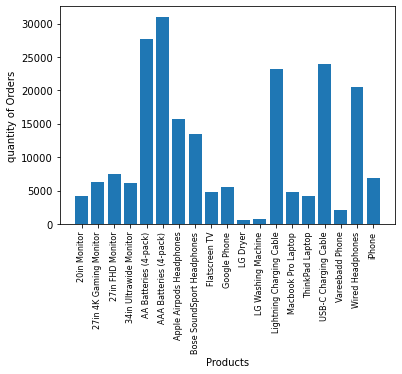

In [24]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
products=[product for product , df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products , rotation='vertical' ,size=8)
plt.xlabel('Products')
plt.ylabel('quantity of Orders')
plt.show()

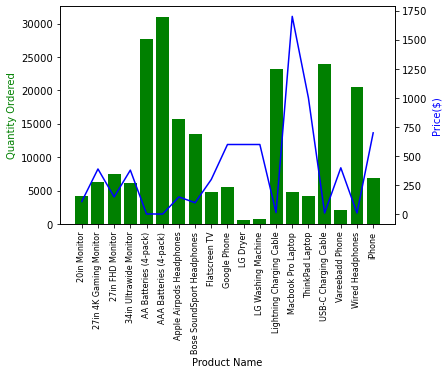

In [25]:
prices=all_data.groupby('Product').mean()['Price Each']

ax1=plt.subplot()
ax2=ax1.twinx()
ax1.bar(products, quantity_ordered , color='g')
ax2.plot(products , prices ,'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)' , color='b')
ax1.set_xticklabels(products , rotation='vertical',size=8)
plt.show()

here AAA Batteries (4-pack) has the lowest price but had the most order 
or Macbook Pro Laptop has the highest price but had the least orders in the year

In [26]:
all_data.describe()

Quantity Ordered     Price Each          Month          Sales  \
count     185950.000000  185950.000000  185950.000000  185950.000000   
mean           1.124383     184.399735       7.059140     185.490917   
std            0.442793     332.731330       3.502996     332.919771   
min            1.000000       2.990000       1.000000       2.990000   
25%            1.000000      11.950000       4.000000      11.950000   
50%            1.000000      14.950000       7.000000      14.950000   
75%            1.000000     150.000000      10.000000     150.000000   
max            9.000000    1700.000000      12.000000    3400.000000   

                Hour         Minute  
count  185950.000000  185950.000000  
mean       14.413305      29.481361  
std         5.423416      17.317573  
min         0.000000       0.000000  
25%        11.000000      14.000000  
50%        15.000000      29.000000  
75%        19.000000      45.000000  
max        23.000000      59.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D506A839A0>,
      dtype=object)

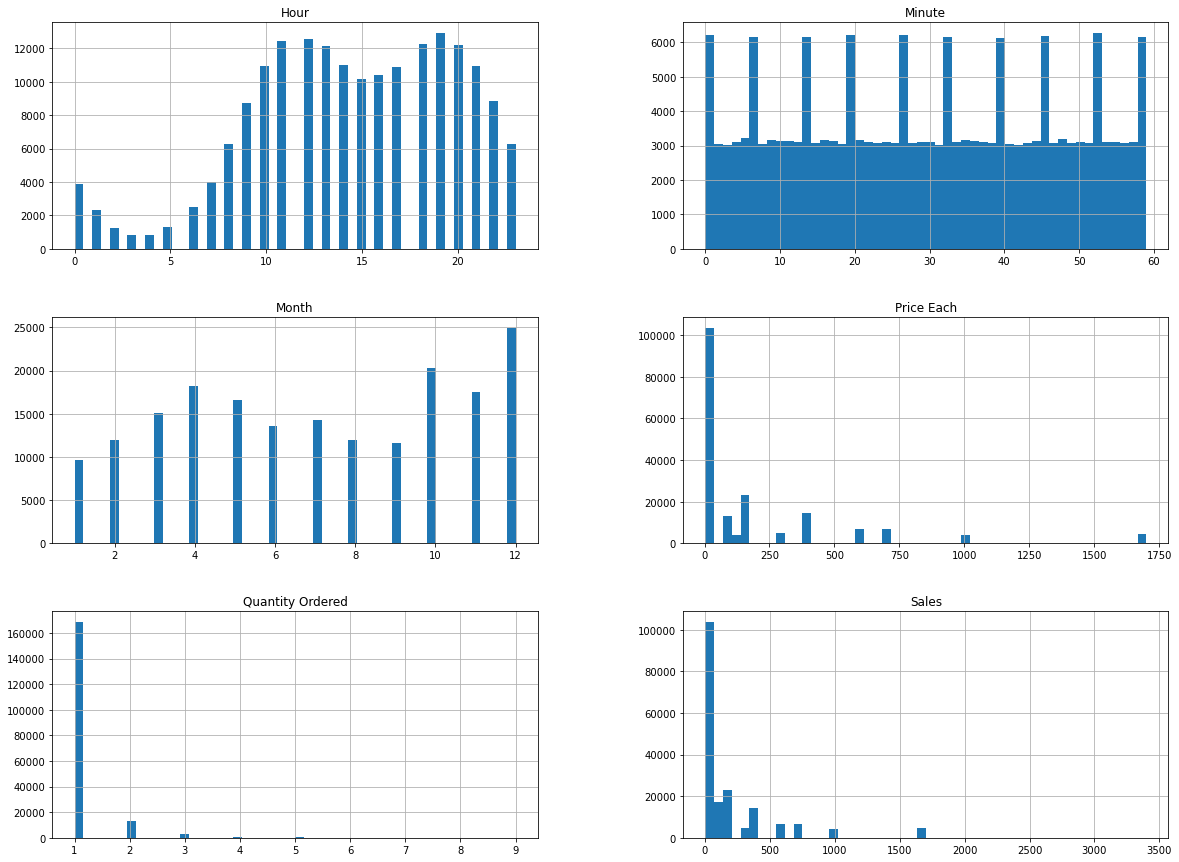

In [27]:
all_data.hist(bins=50 , figsize=(20,15))

In [28]:
correlation=all_data.corr()

In [29]:
correlation['Sales'].sort_values(ascending=False)

Sales               1.000000
Price Each          0.999203
Hour                0.001668
Minute             -0.002162
Month              -0.003466
Quantity Ordered   -0.139417
Name: Sales, dtype: float64

In [30]:
# from pandas.plotting import scatter_matrix
# attributes =["Sales" , "Price Each" ,"Quantity Ordered","Product"]
# scatter_matrix(all_data[attributes], figsize=(12,8))

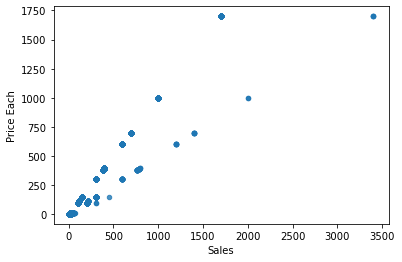

In [31]:
all_data.plot(kind="scatter" , x="Sales" , y="Price Each" ,alpha=0.8)